In [1]:
using Distributions, Random
Random.seed!(123) # Setting the seed

┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1273


MersenneTwister(UInt32[0x0000007b], Random.DSFMT.DSFMT_state(Int32[1464307935, 1073116007, 222134151, 1073120226, -290652630, 1072956456, -580276323, 1073476387, 1332671753, 1073438661  …  138346874, 1073030449, 1049893279, 1073166535, -1999907543, 1597138926, -775229811, 32947490, 382, 0]), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], UInt128[0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000  …  0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x0000000000000

In [2]:
# the plan is to simulate intensity distribution by using a Poisson distribution
# over a small area.  The first thing that we have to figure out is over which length
# a normal distribution will be non-zero given double resolution
w = 2 # is the way the Gaussian width is defined in optics
sigma = w/2
ep = 1.0
x = range(-20,stop=20,length=200)
d = Normal(0.0,sigma)
intensity = ep*sigma*sqrt(2*π)*pdf.(d,x)
println(x[2]," ",x[end-1])

-19.798994974874372 19.798994974874372


In [3]:
import Pkg; Pkg.add("PyPlot")
using PyPlot

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %39.1 %>        ]  78.5 % Resolving package versions...
 Installed Libz ───────────────── v1.0.1
 Installed ExponentialUtilities ─ v1.6.0
 Installed QuadGK ─────────────── v2.3.1
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
  [d4d017d3] ↑ ExponentialUtilities v1.5.1 ⇒ v1.6.0
  [2ec943e9] ↑ Libz v1.0.0 ⇒ v1.0.1
  [1fd47b50] ↑ QuadGK v2.3.0 ⇒ v2.3.1


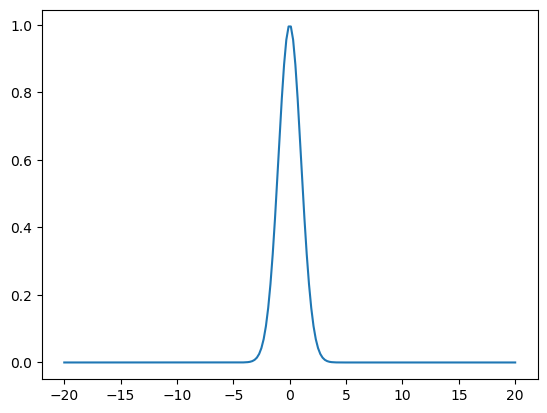

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12af45198>

In [4]:
plot(x,intensity)

In [5]:
# set limits and define the length of the box
xlim1 = x[2]
xlim2 = x[end-1]
L = xlim2-xlim1
print(L)

39.597989949748744

In [6]:
# we want a certain number of particles per length
# for a particular w which represents an effective size of sqrt(pi)/2*w
N_avg = 1
N_avg_L = N_avg*L/sqrt(π)*sqrt(2)/w
print(N_avg_L)

#empty list of intensities
int_list = zeros(0)

N_samples = 1000000
p = Poisson(N_avg_L)
N_draws = rand(p,N_samples)
for i = 1:N_samples
    positions = rand(N_draws[i]).*L .+ xlim1
    intensities = ep .* sigma .* sqrt(2*π)*pdf.(d,positions)
    append!( int_list, sum(intensities) )
end


15.797312409865778

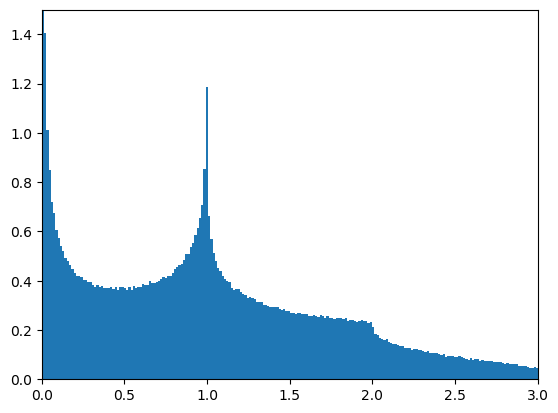

(0, 1.5)

In [7]:
hist(int_list,bins=500,density=true)
xlim((0,3))
ylim((0,1.5))

In [8]:
println(mean(int_list))

1.0006140644724737


In [9]:
# now lets create from this list a sequence of photon arrival times
photons_particle = 10.0
times_total = zeros(0)
for (index,i) in enumerate(int_list)
    p = Poisson(i*photons_particle)
    particles = rand(p)
    times = sort(rand(particles))
    append!(times_total,times .+ index)
end

delta_t = diff(times_total)

10010572-element Array{Float64,1}:
 0.15842893902795563 
 0.017183678801685254
 0.06751712967136303 
 0.016078875821886385
 0.04161958659315346 
 0.03267941339246461 
 0.1540603961015865  
 0.06171876933965281 
 0.010213579834108977
 0.04271885192320379 
 0.03971737808950593 
 0.019805423059781724
 0.010124463842937192
 ⋮                   
 0.03380990447476506 
 0.011717770830728114
 0.06487963593099266 
 0.06505736079998314 
 0.08282666455488652 
 0.06905257189646363 
 0.03257773129735142 
 0.022249894915148616
 0.209638831904158   
 0.04653710953425616 
 0.14323845447506756 
 0.09655914653558284 

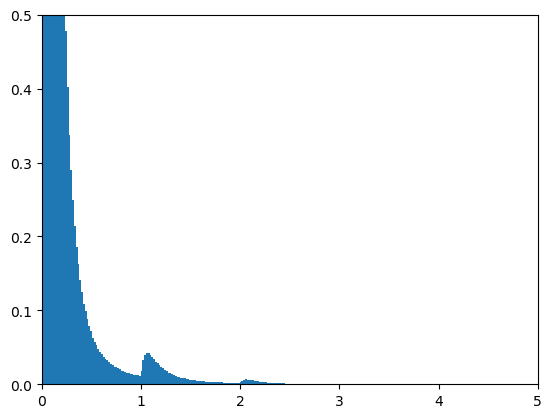

(0, 0.5)

In [10]:
hist(delta_t,bins=500,density=true)
xlim((0,5))
ylim((0,0.5))

In [11]:
# now lets create from this list a sequence of photon arrival times
photons_particle = 10.0
times_total2 = zeros(0)
for (index,i) in enumerate(sort(int_list))
    p = Poisson(i*photons_particle)
    particles = rand(p)
    times = sort(rand(particles))
    append!(times_total2,times .+ index)
end

delta_t2 = diff(times_total2)

10007118-element Array{Float64,1}:
 2565.0934524404074      
  348.6983229786201      
 1324.441944415863       
  528.1371440766598      
  605.8506275298059      
 1490.0701271336948      
 1928.7659651878057      
 2208.4501038615344      
 1088.557109643567       
 1049.884908701235       
  372.07385104862624     
   30.67853817629657     
  366.58676824306167     
    ⋮                    
    0.07244868250563741  
    0.0013248344184830785
    0.020417356747202575 
    0.008082082378678024 
    0.013756165746599436 
    0.01095217012334615  
    0.006473071640357375 
    0.0051951289642602205
    0.0015147817321121693
    0.0014208676293492317
    0.004860259708948433 
    0.015009466791525483 

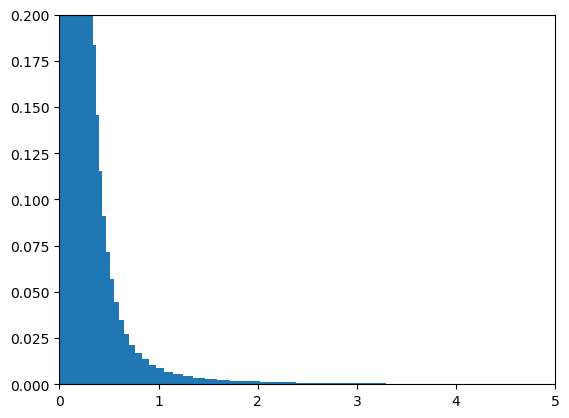

(0, 0.2)

In [12]:
hist(delta_t2,bins=10 .^(range(-3,stop=4,length=200)),density=true)
xlim((0,5))
ylim((0,0.2))
#yscale("log")

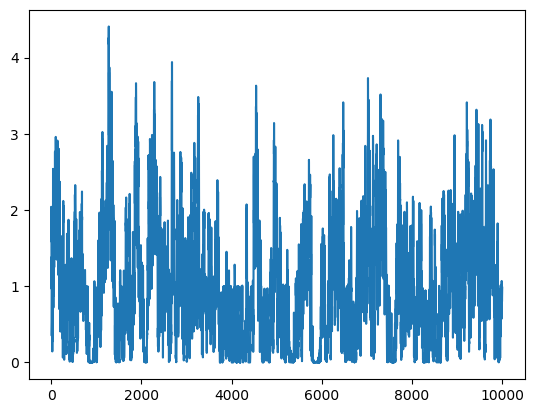

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x14ab2afd0>

In [13]:
# it is clear that the photon arrival times are dependent on the order we sample the intensities
# we therefore need to simulate realistic FCS time traces
dt = 0.1
D = 1.0
L = 10
#xl = 5.0
#xr = 6.0
N = 8
length = 1000000

focus = Normal(0.0,sigma)
diffusion = Normal(0.0,sqrt(2*D*dt))

# generate steps for all particles
# initial positions


fcs_intensity = zeros(0)
x = 2*L*rand(N)
append!(fcs_intensity,sum(sqrt(2*π)*pdf.(focus,x.-L)))

for i = 1:length
    x = x .+ rand(diffusion,size(x))
    x = mod.(x,2L)
    append!(fcs_intensity,sum(sqrt(2*π)*pdf.(focus,x.-L)))
end
plot(fcs_intensity[1:10000])

In [14]:
print(mean(fcs_intensity))

0.9926052620758495

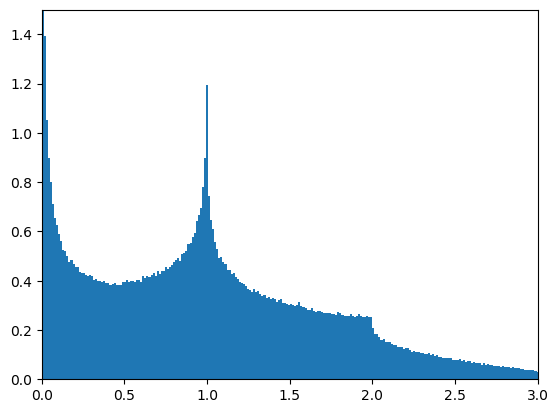

(0, 1.5)

In [15]:
hist(fcs_intensity,bins=500,density=true)
xlim((0,3))
ylim((0,1.5))

In [16]:
# now lets create from this list a sequence of photon arrival times
photons_particle = 100.0
times_total3 = zeros(0)
for (index,i) in enumerate(fcs_intensity)
    p = Poisson(i*photons_particle)
    particles = rand(p)
    times = sort(rand(particles))
    append!(times_total3,times .+ index)
end

delta_t3 = diff(times_total3)

99266787-element Array{Float64,1}:
 0.012052436252832477 
 0.010962720338722365 
 0.010111696551867722 
 0.0010212099185002987
 0.0022174405644008743
 0.0049631631724080805
 0.0073292652958185656
 0.002092135105556281 
 0.008045821967056943 
 0.0044464616102857235
 0.006458944696679625 
 0.0070268945784506265
 0.016731164560247924 
 ⋮                    
 0.0033905849559232593
 0.012705179513432086 
 0.024232445284724236 
 0.004079709528014064 
 0.01040784700307995  
 0.005549197434447706 
 0.0004586449358612299
 0.005759214051067829 
 0.0007600302342325449
 0.0291294832713902   
 0.00947799684945494  
 0.013996523688547313 

In [17]:
print(mean(delta_t3))

0.010073872680583034

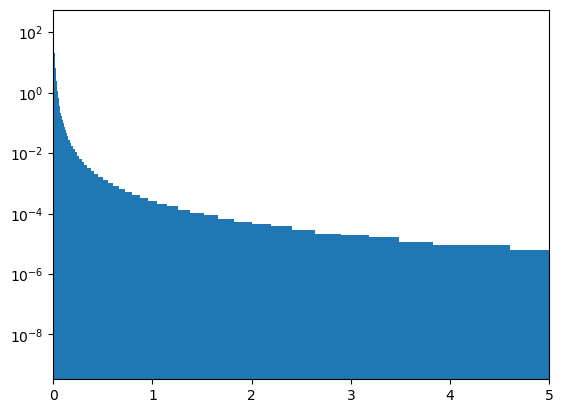

In [18]:
hist(delta_t3,bins=10 .^(range(-4,stop=4,length=200)),density=true)
xlim((0,5))
#ylim((0,1))
yscale("log")

In [19]:
# there is nothing to see in the distribution of delta_t's
# we may have to look at calculated intensities
counts = zeros(0)
count=0
binsize=1.0
step = binsize
for t in times_total3
    if t<=step
        count = count +1
    else
        step = step + binsize
        append!(counts,count)
        count = 0
    end
end

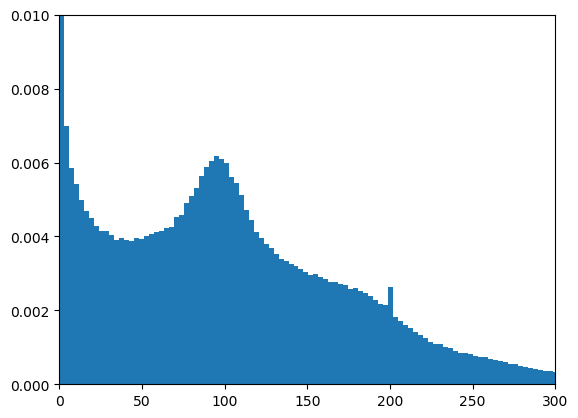

(0, 0.01)

In [20]:
hist(counts,bins=200,density=true)
xlim((0,300))
ylim((0,0.01))
#yscale("log")